In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


In [3]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [4]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7719833333333334, 0.7773
train acc, test acc | 0.8766833333333334, 0.881
train acc, test acc | 0.8982166666666667, 0.9023
train acc, test acc | 0.9080166666666667, 0.9122
train acc, test acc | 0.91475, 0.9189
train acc, test acc | 0.9197666666666666, 0.9222
train acc, test acc | 0.9238666666666666, 0.9261
train acc, test acc | 0.9284833333333333, 0.929
train acc, test acc | 0.9318, 0.932
train acc, test acc | 0.9346666666666666, 0.9352
train acc, test acc | 0.93725, 0.9367
train acc, test acc | 0.93915, 0.9393
train acc, test acc | 0.9422, 0.941
train acc, test acc | 0.9431, 0.9427
train acc, test acc | 0.9455333333333333, 0.9446
train acc, test acc | 0.9472833333333334, 0.946


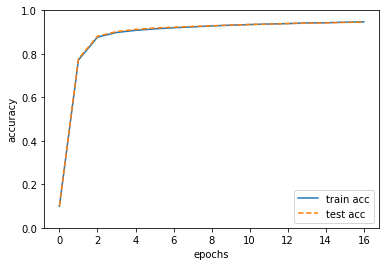

In [5]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()